<a href="https://colab.research.google.com/github/jomendietad/SenalesYSistemas/blob/main/Talleres/youtube_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#cargar datos desde drive acceso libre
#1W8e1WyPIS-RTOOWw98JgNJ6vJgtG-NFh
FILEID = "1W8e1WyPIS-RTOOWw98JgNJ6vJgtG-NFh" #"1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-06-14 01:22:11--  https://docs.google.com/uc?export=download&confirm=&id=1W8e1WyPIS-RTOOWw98JgNJ6vJgtG-NFh
Resolving docs.google.com (docs.google.com)... 142.251.189.138, 142.251.189.139, 142.251.189.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.189.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1W8e1WyPIS-RTOOWw98JgNJ6vJgtG-NFh&export=download [following]
--2025-06-14 01:22:11--  https://drive.usercontent.google.com/download?id=1W8e1WyPIS-RTOOWw98JgNJ6vJgtG-NFh&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.200.132, 2607:f8b0:4001:c16::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9159 (8.9K) [application/octet-stream]
Saving to: ‘canciones.xlsx’

canciones.xlsx      100%[===================>]   8.94K  --.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,link,band,type,type_num
0,https://www.youtube.com/watch?v=lIkq-a92p_Q,Morat,Pop,1
1,https://www.youtube.com/watch?v=-vOgEO13FYA,Morat,Pop,1
2,https://www.youtube.com/watch?v=m24htoJZH4Q,Morat,Pop,1
3,https://www.youtube.com/watch?v=U29h5Ocgj30,Morat,Pop,1
4,https://www.youtube.com/watch?v=uE5pTMfxjBU,Morat,Pop,1
5,https://www.youtube.com/watch?v=Hc_kwCGNhn0,Morat,Pop,1
6,https://www.youtube.com/watch?v=5elCRX5cSxk,Morat,Pop,1
7,https://www.youtube.com/watch?v=hVR5KK2T8zQ,Morat,Pop,1
8,https://www.youtube.com/watch?v=bcaLBKH-Yfc,JBalvin,Regueton,2
9,https://www.youtube.com/watch?v=_tG70FWd1Ds,JBalvin,Regueton,2


In [3]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

# Paquete de carga de cookies para el control anti-bots captcha
!pip install browser-cookie3

import os
import yt_dlp as youtube_dl
import browser_cookie3

try:
    cookies = browser_cookie3.firefox()
except:
    print("No se pueden descargar cookies desde firefox. Intentando Chrome...")
    try:
        cookies = browser_cookie3.chrome()
    except:
        print("No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.")
        cookies = None

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':f'{name}.mp3',
    }
    if cookies:
        options['cookiefile'] = None
        options['cookiejar'] = cookies;

    with youtube_dl.YoutubeDL(options) as ydl:
        try:
            video_info = ydl.extract_info(video_url, download=False)
            ydl.download([video_info['webpage_url']])
            print("Download complete... {}".format(filename))
        except Exception as e:
            print(f"Error descargando {video_url}: {e}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.6.9-py3-none-any.whl size=3017173 sha256=f36fbc53d54ba3cc0439ef04f4607233803435989a5e123e6e60d330e75b3cb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-6bb898kq/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00
No se pueden descargar cookies desde firefox. Intentando Chrome...
No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.


In [4]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    try: # Added try block to catch download errors
        download_ytvid_as_mp3(X.loc[n,'link'],name_)
        #convertir a .wav
        subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                       name_+'.wav'])
    except youtube_dl.utils.DownloadError as e: # Catch the specific DownloadError
        print(f"Skipping video {X.loc[n,'link']} due to download error: {e}") # Print a message and skip

video 1 de 16
link: https://www.youtube.com/watch?v=lIkq-a92p_Q

band: Morat

type: Pop

[youtube] Extracting URL: https://www.youtube.com/watch?v=lIkq-a92p_Q
[youtube] lIkq-a92p_Q: Downloading webpage
[youtube] lIkq-a92p_Q: Downloading tv client config
[youtube] lIkq-a92p_Q: Downloading player 94f771d8-main
[youtube] lIkq-a92p_Q: Downloading tv player API JSON
[youtube] lIkq-a92p_Q: Downloading ios player API JSON
[youtube] lIkq-a92p_Q: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=lIkq-a92p_Q
[youtube] lIkq-a92p_Q: Downloading webpage
[youtube] lIkq-a92p_Q: Downloading tv client config
[youtube] lIkq-a92p_Q: Downloading tv player API JSON
[youtube] lIkq-a92p_Q: Downloading ios player API JSON
[youtube] lIkq-a92p_Q: Downloading m3u8 information
[info] lIkq-a92p_Q: Downloading 1 format(s): 251
[download] Destination: results/Morat_0_1.mp3
[download] 100% of    3.68MiB in 00:00:00 at 5.29MiB/s   
Error descargando https://www.youtube.com/watch?v=

[youtube] 5elCRX5cSxk: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=5elCRX5cSxk
[youtube] 5elCRX5cSxk: Downloading webpage
[youtube] 5elCRX5cSxk: Downloading tv client config
[youtube] 5elCRX5cSxk: Downloading tv player API JSON
[youtube] 5elCRX5cSxk: Downloading ios player API JSON


[youtube] 5elCRX5cSxk: Downloading m3u8 information
[info] 5elCRX5cSxk: Downloading 1 format(s): 234
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 33
[download] Destination: results/Morat_6_1.mp3
[download] 100% of    2.64MiB in 00:00:01 at 1.55MiB/s                 
Error descargando https://www.youtube.com/watch?v=5elCRX5cSxk: name 'filename' is not defined
video 8 de 16
link: https://www.youtube.com/watch?v=hVR5KK2T8zQ

band: Morat

type: Pop

[youtube] Extracting URL: https://www.youtube.com/watch?v=hVR5KK2T8zQ
[youtube] hVR5KK2T8zQ: Downloading webpage
[youtube] hVR5KK2T8zQ: Downloading tv client config
[youtube] hVR5KK2T8zQ: Downloading tv player API JSON
[youtube] hVR5KK2T8zQ: Downloading ios player API JSON
[youtube] hVR5KK2T8zQ: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=hVR5KK2T8zQ
[youtube] hVR5KK2T8zQ: Downloading webpage
[youtube] hVR5KK2T8zQ: Downloading tv client config
[youtube] hVR5KK2T8zQ: Downloading tv

In [5]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['JBalvin_12_2.wav',
 'JBalvin_14_2.wav',
 'Morat_0_1.wav',
 'JBalvin_10_2.wav',
 'Morat_7_1.wav',
 'JBalvin_13_2.wav',
 'JBalvin_8_2.wav',
 'Morat_6_1.wav',
 'Morat_5_1.wav',
 'Morat_3_1.wav',
 'JBalvin_9_2.wav',
 'Morat_1_1.wav',
 'JBalvin_11_2.wav',
 'JBalvin_15_2.wav',
 'Morat_4_1.wav',
 'Morat_2_1.wav']

In [6]:
import soundfile as sf # para instalar pip install soundfile
from scipy.signal import resample_poly
import numpy as np
import os

#leer archivos y crear np.array audios
fs = 48000
tl = np.array([30,40,50,60,70,80]) #puntos lectura
ts = 5 #t segmento
# The total number of samples for each segment at the target fs
segment_length_fs = int(ts * fs)
Ns = len(wav_files)*len(tl) #cantidad segmentos
# x_t should be initialized with the shape corresponding to the target fs
x_t = np.zeros((Ns, segment_length_fs, 2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
type_c = X['type'].unique()
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs_i = sf.read(path+name)
    # Ensure x is at least 2D (for stereo)

    if x.ndim == 1:
        x = np.expand_dims(x, axis=1) # Add a channel dimension if mono
    if x.shape[1] == 1: # If still mono after expand_dims
        x = np.repeat(x, 2, axis=1) # Convert mono to stereo by repeating the channel

    # Check if the audio file has enough data for the requested segments
    if len(x) < int(fs_i * (tl[-1] + ts)):
        print(f"Warning: File {name} is too short for all requested segments. Skipping some segments.")
        valid_tl = tl[tl + ts <= len(x)/fs_i]
    else:
        valid_tl = tl

    for ti in valid_tl: #segmentos de tiempo
        print(name,'x',x.shape,'fs actual:',fs_i)

        # Slice based on the original sampling rate fs_i
        start_sample = int(fs_i * ti)
        end_sample = int(fs_i * (ti + ts))
        xc = x[start_sample:end_sample, :]

        # Check if the sliced segment has enough data for resampling
        # This can happen if the calculated end_sample exceeds the actual audio length
        if xc.shape[0] < int(ts * fs_i):
            print(f"Warning: Segment from {ti}s to {ti+ts}s in {name} is shorter than expected. Skipping.")
            continue # Skip this segment

        if fs_i != fs:
            # Resample using resample_poly
            # The output length of resample_poly is len(xc) * up / down
            # We want the resampled length to be exactly segment_length_fs
            # So we need to calculate up and down such that len(xc) * up / down = segment_length_fs
            # Or simply use the desired number of samples directly if supported by resample_poly
            # resample_poly can take 'nyq' or 'kaiser_beta' arguments for filter design,
            # but for simple resampling to a target number of points, a direct approach is needed.
            # A simpler resample function might be better, or calculate up/down differently.

            # Let's use a method that targets the desired number of samples directly.
            # scipy.signal.resample can do this, but it uses FFT and might not be ideal.
            # Let's adjust the resampling calculation with resample_poly to ensure the correct output size.
            # Target output size is segment_length_fs.
            # Current size is xc.shape[0].
            # We want xc.shape[0] * (up / down) = segment_length_fs
            # Let's find up and down that approximate fs/fs_i
            # A more robust way is to use a library that handles resampling to a specific length.
            # For now, let's ensure the resampled array is truncated or padded if necessary,
            # although it's better to get the resampling right.

            # A common approach for arbitrary resampling is
            # import librosa
            # xc_resampled = librosa.resample(xc, orig_sr=fs_i, target_sr=fs)
            # However, this outputs a 1D array for mono. Need to handle stereo.

            # Let's stick with resample_poly but ensure the output is the correct size.
            # If resampling makes it slightly longer or shorter, we'll handle it.
            gcd_val = np.gcd(fs, fs_i)
            up_val = fs // gcd_val
            down_val = fs_i // gcd_val

            # Resample each channel separately
            xc_resampled_ch1 = resample_poly(xc[:, 0], up=up_val, down=down_val)
            xc_resampled_ch2 = resample_poly(xc[:, 1], up=up_val, down=down_val)

            # Combine channels
            xc_resampled = np.stack((xc_resampled_ch1, xc_resampled_ch2), axis=-1)

            # Ensure the resampled segment has the target length (segment_length_fs)
            if xc_resampled.shape[0] > segment_length_fs:
                xc_resampled = xc_resampled[:segment_length_fs, :]
            elif xc_resampled.shape[0] < segment_length_fs:
                # Pad with zeros if shorter
                padding = np.zeros((segment_length_fs - xc_resampled.shape[0], 2))
                xc_resampled = np.vstack((xc_resampled, padding))

            xc = xc_resampled # Use the resampled array
            print(f"Resampled to shape: {xc.shape}")

        # Now xc should have the shape (segment_length_fs, 2) which is (240000, 2)
        if xc.shape[0] != segment_length_fs:
             print(f"Error: Resampled segment has incorrect length {xc.shape[0]}. Expected {segment_length_fs}. Skipping.")
             continue # Skip this segment if resampling failed to produce correct length


        x_t[i] = xc
        # The label indexing seems to assume the order of wav_files matches the order in X
        # and the type_num is the last digit before '.wav' and is 1 or 2.
        # This might be fragile. Consider using the 'type_num' column from X directly
        # based on the filename or a mapping.
        # For now, sticking to the original logic for the label.
        try:
             # Extract type_num from the filename
             parts = name.split('_')
             type_num_str = parts[-1].split('.')[0]
             label[i] = int(type_num_str)
        except (IndexError, ValueError):
             print(f"Warning: Could not extract type_num from filename {name}. Setting label to 0.")
             label[i] = 0 # Assign a default or error label

        # The name_c logic also seems to assume the filename format.
        # Sticking to original logic.
        name_c += [name[:-4]] # Remove '.wav' from the end


        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")
        i+=1

# After the loop, if some segments were skipped, the actual number of populated segments in x_t and label
# might be less than Ns. We should truncate these arrays to the actual number of populated segments.
# Ns was calculated based on the initial assumption of processing all segments.
# Let's re-calculate the effective Ns (number of processed segments).
effective_Ns = i
x_t = x_t[:effective_Ns]
label = label[:effective_Ns]
name_c = name_c[:effective_Ns]

x_t.shape

JBalvin_12_2.wav x (12028309, 2) fs actual: 48000
0 lectura: JBalvin_12_2.wav; segundo 30:35; tipo música: Regueton
JBalvin_12_2.wav x (12028309, 2) fs actual: 48000
1 lectura: JBalvin_12_2.wav; segundo 40:45; tipo música: Regueton
JBalvin_12_2.wav x (12028309, 2) fs actual: 48000
2 lectura: JBalvin_12_2.wav; segundo 50:55; tipo música: Regueton
JBalvin_12_2.wav x (12028309, 2) fs actual: 48000
3 lectura: JBalvin_12_2.wav; segundo 60:65; tipo música: Regueton
JBalvin_12_2.wav x (12028309, 2) fs actual: 48000
4 lectura: JBalvin_12_2.wav; segundo 70:75; tipo música: Regueton
JBalvin_12_2.wav x (12028309, 2) fs actual: 48000
5 lectura: JBalvin_12_2.wav; segundo 80:85; tipo música: Regueton


<ipython-input-6-2722154239>:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")


JBalvin_14_2.wav x (9436160, 2) fs actual: 48000
6 lectura: JBalvin_14_2.wav; segundo 30:35; tipo música: Regueton
JBalvin_14_2.wav x (9436160, 2) fs actual: 48000
7 lectura: JBalvin_14_2.wav; segundo 40:45; tipo música: Regueton
JBalvin_14_2.wav x (9436160, 2) fs actual: 48000
8 lectura: JBalvin_14_2.wav; segundo 50:55; tipo música: Regueton
JBalvin_14_2.wav x (9436160, 2) fs actual: 48000
9 lectura: JBalvin_14_2.wav; segundo 60:65; tipo música: Regueton
JBalvin_14_2.wav x (9436160, 2) fs actual: 48000
10 lectura: JBalvin_14_2.wav; segundo 70:75; tipo música: Regueton
JBalvin_14_2.wav x (9436160, 2) fs actual: 48000
11 lectura: JBalvin_14_2.wav; segundo 80:85; tipo música: Regueton
Morat_0_1.wav x (11295487, 2) fs actual: 48000
12 lectura: Morat_0_1.wav; segundo 30:35; tipo música: Pop
Morat_0_1.wav x (11295487, 2) fs actual: 48000
13 lectura: Morat_0_1.wav; segundo 40:45; tipo música: Pop
Morat_0_1.wav x (11295487, 2) fs actual: 48000
14 lectura: Morat_0_1.wav; segundo 50:55; tipo mú

(96, 240000, 2)

In [7]:
from IPython.display import Audio #reproducir segmento
i = 0
Audio(x_t[i].T,rate=fs)

In [8]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(96, 120001)

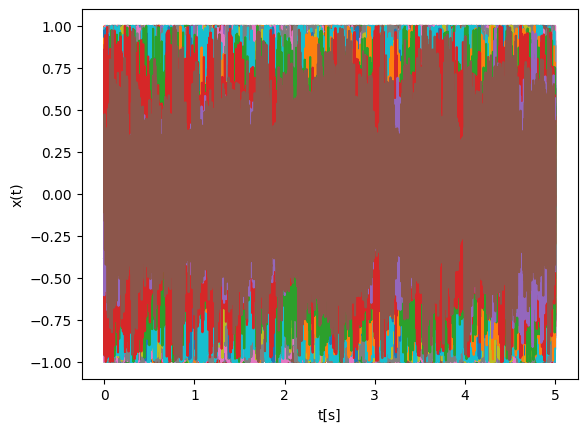

In [9]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

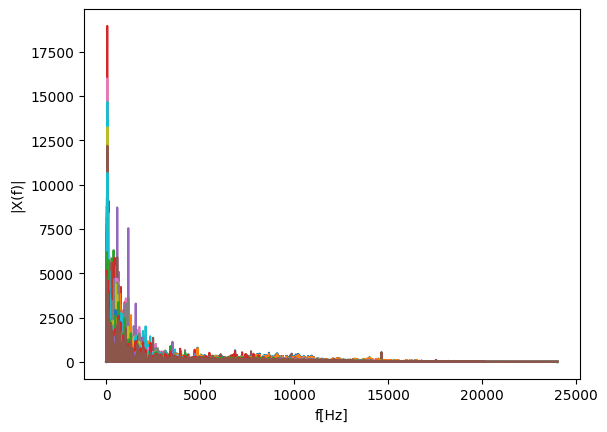

In [10]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

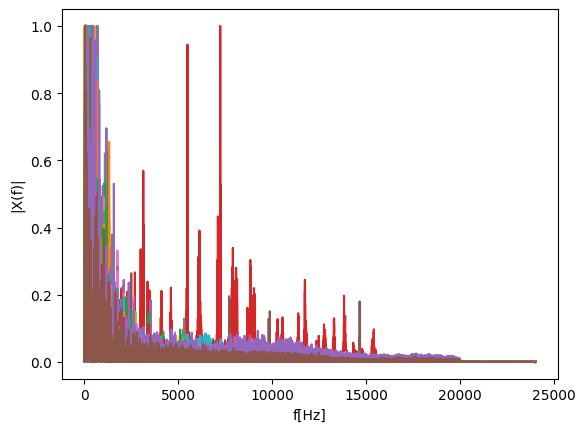

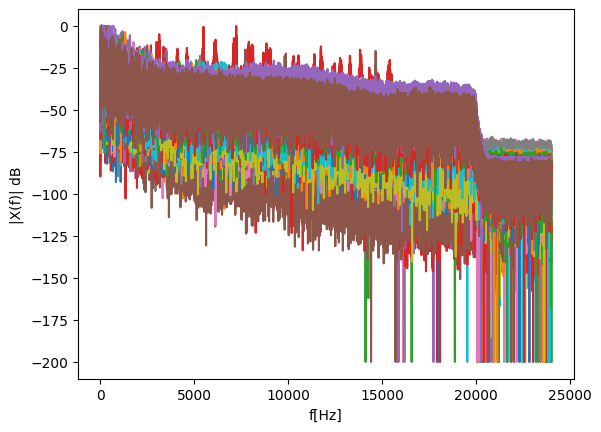

In [11]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

**Nota**: Generalmente el espectro se presenta en [decibeles [dB]](https://es.wikipedia.org/wiki/Decibelio)

## Visualización de los datos en 2D

In [12]:
from umap import UMAP
#visualización de datos
n_neighbors = int(2*np.sqrt(Xw_.shape[0]))
sca_ = MinMaxScaler()

red_ = UMAP(n_components=2,n_neighbors=n_neighbors)
X_2D = sca_.fit_transform(red_.fit_transform(Xw_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


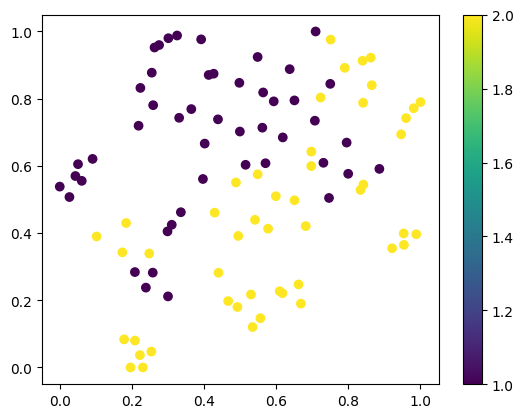

<ipython-input-13-2468643273>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


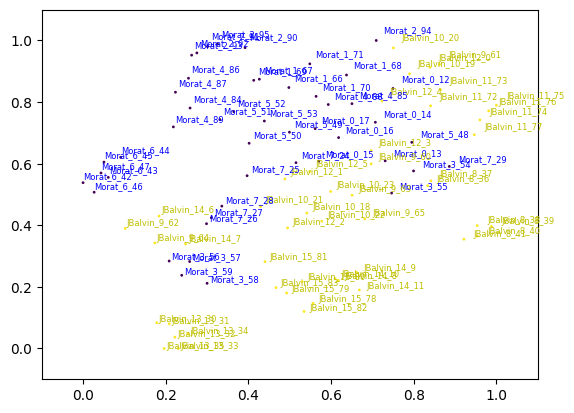

In [13]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

In [14]:
#reproducir audio
i = 66
Audio(x_t[i].T,rate=fs)

# Predicción del género musical sobre espectro de Fourier

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del clasificador RandomForest
model = KNeighborsClassifier(n_neighbors=5)

# Realizar la validación cruzada
# Xw_ son tus características y label son tus etiquetas
# cv define el número folds para la validación cruzada
scores = cross_val_score(model, Xw_, label.ravel(), cv=5,scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Acierto para cada Fold:", scores)
print("Acierto promedio:", scores.mean())
print("Desviación estándar del Acierto:", scores.std())

#entrenar modelo para predecir nuevas canciones
model.fit(Xw_, label.ravel())

Acierto para cada Fold: [0.65       0.68421053 0.63157895 0.68421053 0.68421053]
Acierto promedio: 0.6668421052631579
Desviación estándar del Acierto: 0.022055080883954716


KNeighborsClassifier()

In [16]:
import joblib
#guardar modelo
try:
  os.mkdir('modelo')
except:
  print("Carpeta modelo ya existe")

filename_ = 'modelo/pop_vs_reggaeton'
model_ ={'Xw_':Xw_, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs, 'modelo':model,'type':X['type'].unique()}
joblib.dump(model_,filename_+".pkl")


['modelo/pop_vs_reggaeton.pkl']

In [17]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Para una nueva canción

In [18]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'label', 'name_c', 'vf', 'fs', 'modelo', 'type'])

In [19]:
#evaluar para un segmento en fft normalizado

pred_ = my_model_loaded['modelo'].predict(Xw_[0].reshape(1,-1))[0]
print('Etiqueta estimada: ',my_model_loaded['type'][int(pred_-1)])
print('Etiqueta orignal: ',my_model_loaded['type'][int(my_model_loaded['label'][0][0])-1])

Etiqueta estimada:  Regueton
Etiqueta orignal:  Regueton
